In [1]:
import os 
import pandas as pd 
import numpy as np

In [2]:
dat = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Loan%20Dataset/loan.csv")

In [3]:
dat.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_encoded = dat.copy()
df_encoded.shape

(614, 13)

In [5]:
df_encoded.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df_encoded.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [7]:
df_encoded['Gender'].fillna('Male',inplace=True) #Updating Gender Null Values
df_encoded['Married'].fillna('Yes',inplace=True) #Updating Married Null Values
df_encoded['Dependents'].fillna(0,inplace=True) #Updating Depedndants Null Values
df_encoded['Self_Employed'].fillna('No',inplace=True) #Updating Self_Employed Null Values
df_encoded['LoanAmount'].fillna(df_encoded['LoanAmount'].mean(),inplace=True) #Updating LoanAmount Null Values
df_encoded['Loan_Amount_Term'].fillna(df_encoded['Loan_Amount_Term'].mean(),inplace=True) #Updating Loan_Amount_Term Null Values 
df_encoded['Credit_History'].fillna(1,inplace=True) #Updating Credit_History Null Values

df_encoded['Dependents'] = df_encoded['Dependents'].astype(str) # Changing tye type of Dependents atibute to string
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded['Gender'] = le.fit_transform(df_encoded['Gender'].values)
df_encoded['Married'] = le.fit_transform(df_encoded['Married'].values)
df_encoded['Dependents'] = le.fit_transform(df_encoded['Dependents'].values)
df_encoded['Self_Employed'] = le.fit_transform(df_encoded['Self_Employed'].values)
df_encoded['Education'] = le.fit_transform(df_encoded['Education'].values)
df_encoded['Property_Area'] = le.fit_transform(df_encoded['Property_Area'].values)
df_encoded['Loan_Status'] = le.fit_transform(df_encoded['Loan_Status'].values)
df_encoded.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [8]:
df_encoded.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
feature_cols= ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']
X= df_encoded[feature_cols]
Y = df_encoded['Loan_Status']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.35,random_state=1)
from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)
clf = DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
r2 = accuracy_score(y_test, y_pred)
print(r2)

0.7255813953488373


In [10]:
np.random.seed(45)
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
r2 = accuracy_score(y_test, y_pred)
print(r2)

0.6511627906976745


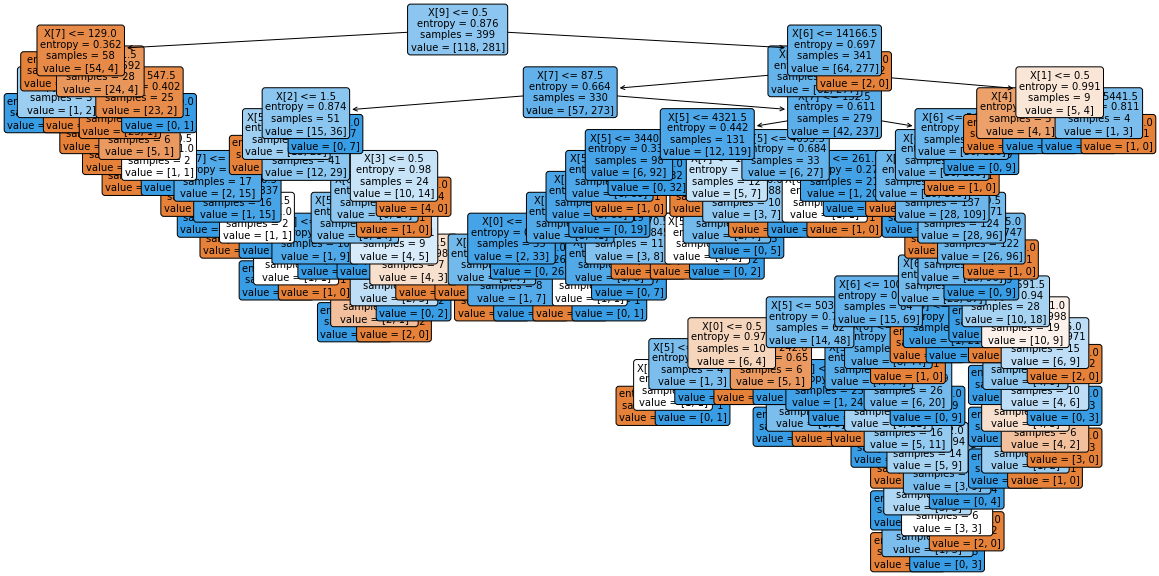

In [11]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(clf, fontsize=10, filled=True, rounded=True)
plt.show()

In [12]:
from sklearn.tree import export_graphviz
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(clf)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7395348837209302

In [13]:
pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 KB 5.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=1a1a5f9b1c3879d9fd15ebeed0522639d5eb853dd5a81f4f16b329edc75dc986
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


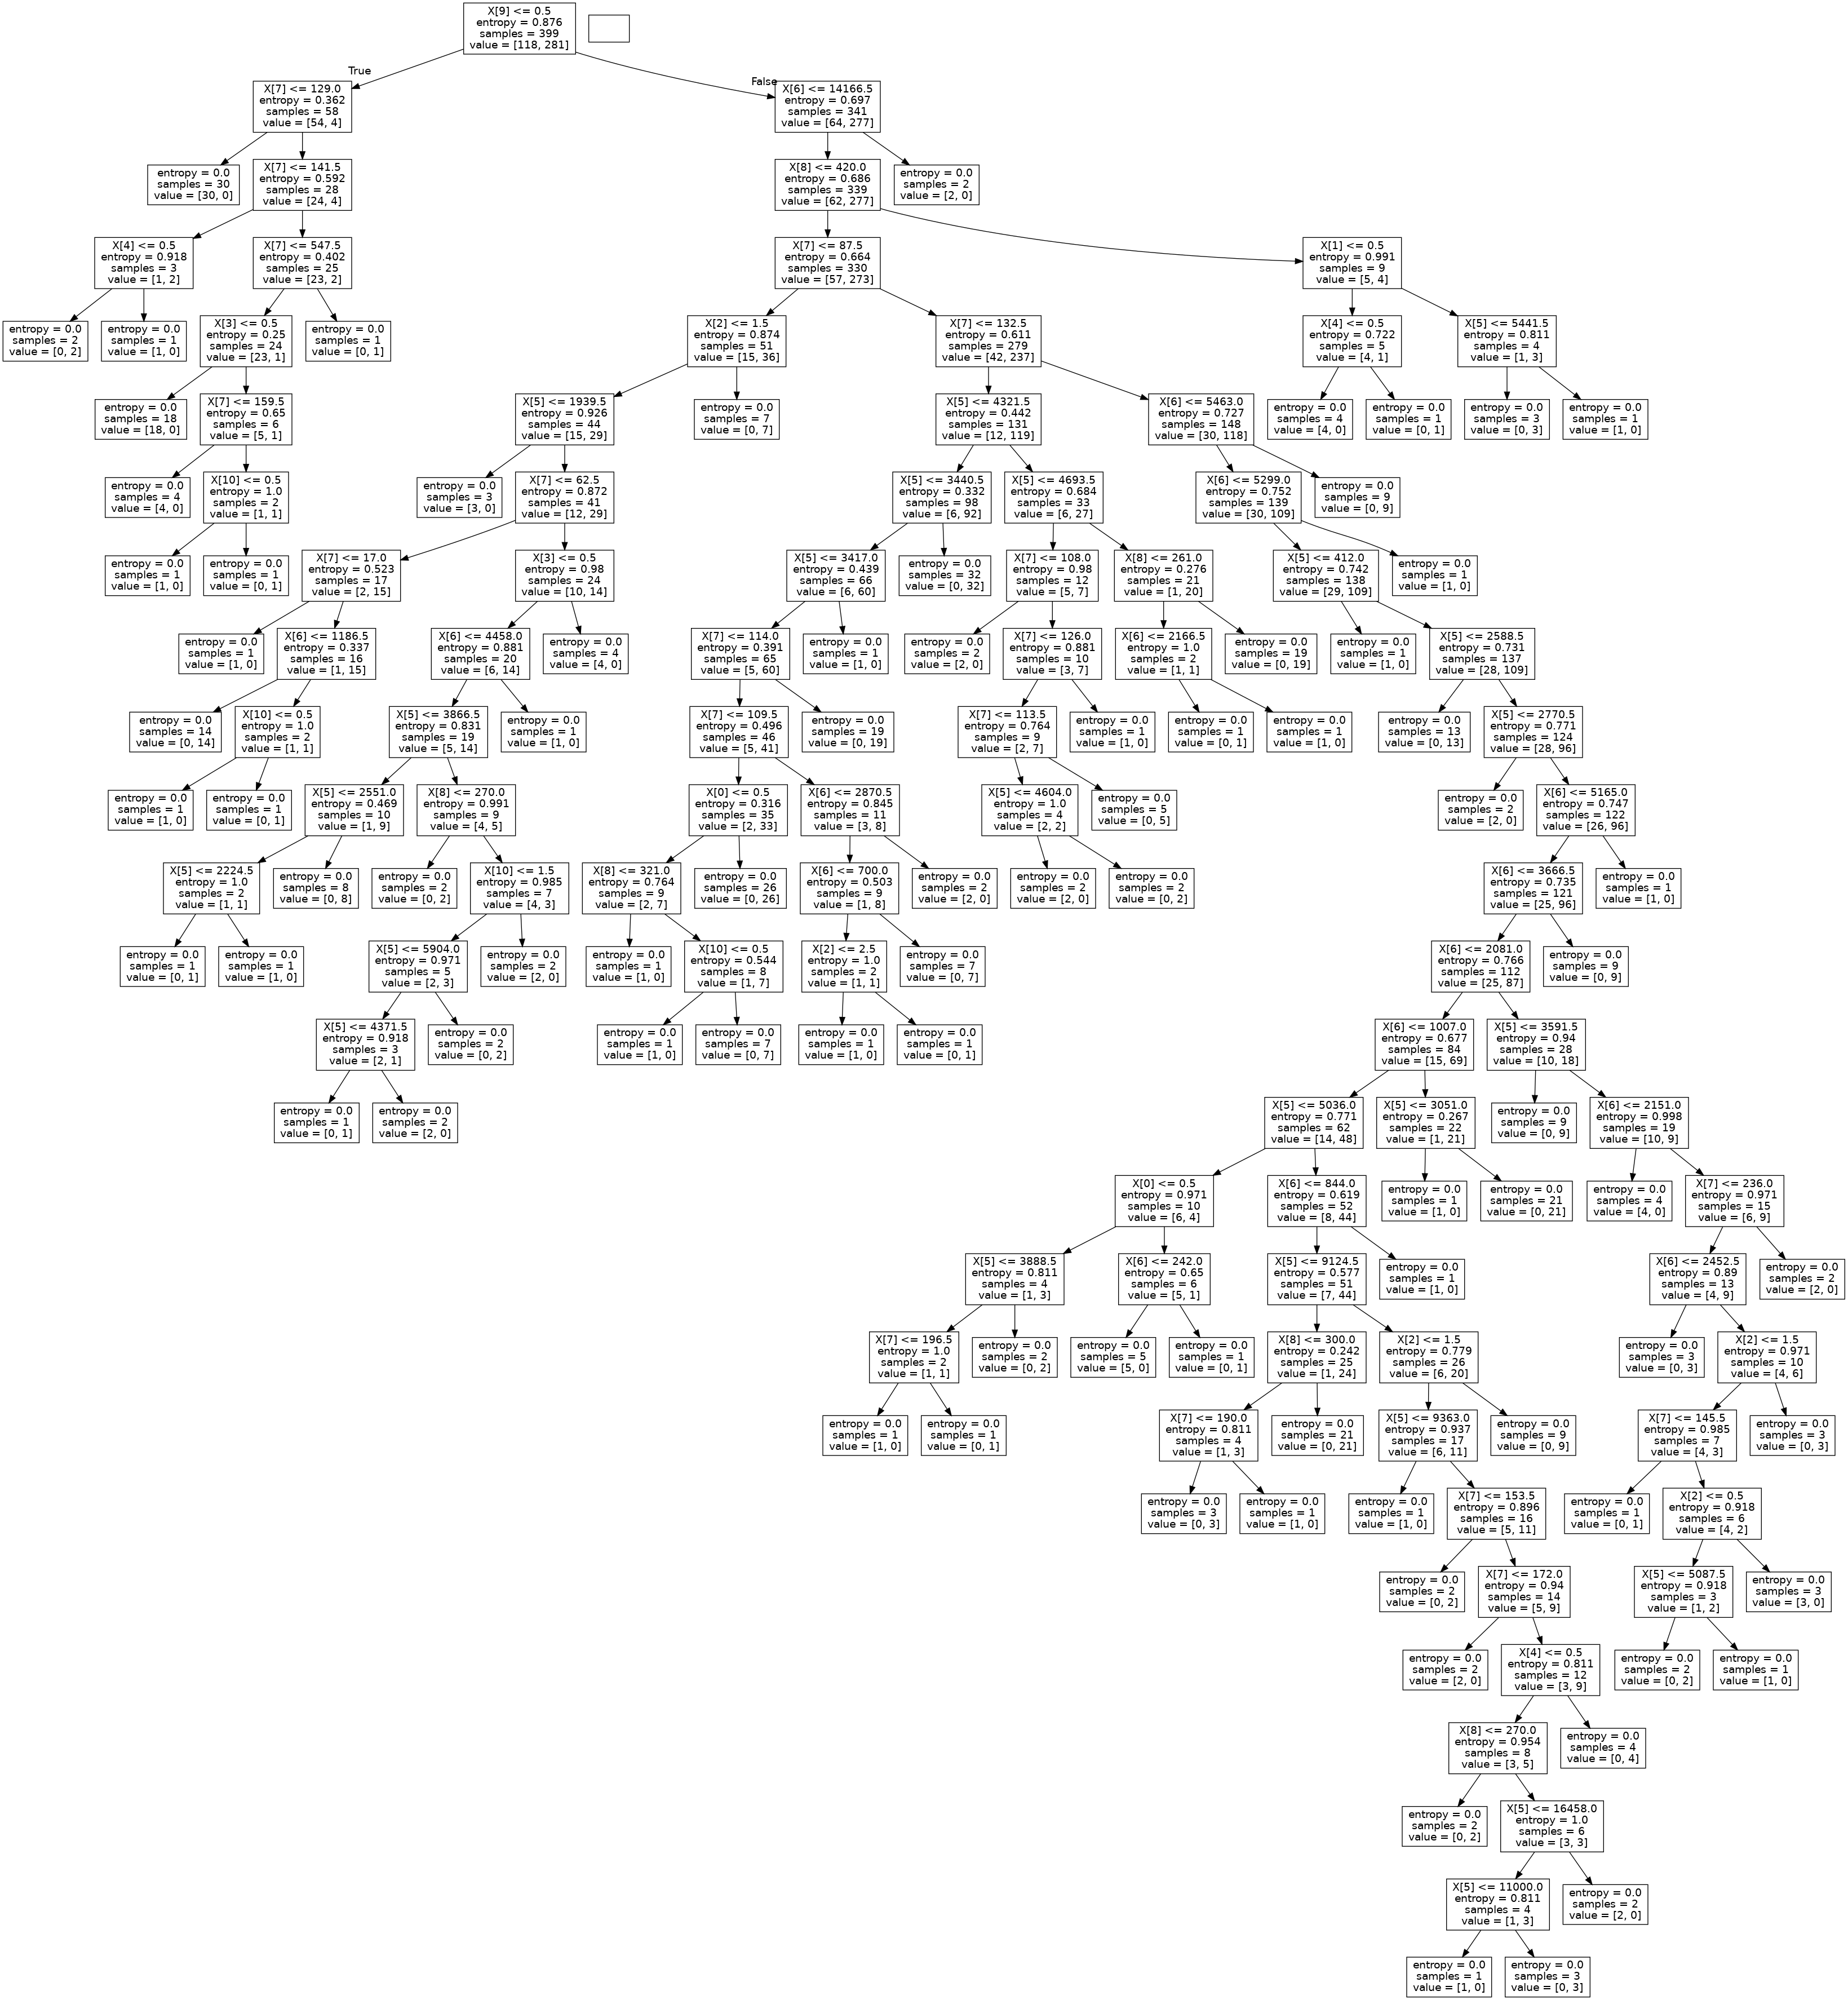

In [14]:
import pydotplus as pypi
from IPython.display import Image
dot_data = export_graphviz(clf)
graph = pypi.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())